In [1]:
import matplotlib.pyplot as plt
import numpy as np


import numpy as np
z = np.loadtxt('SRTM_RAMP2_TOPO_2000-02-11_rgb_3600x1800.CSV', delimiter=',')
print(z.shape)

(1800, 3600)


In [2]:
import matplotlib as mpl

In [3]:
# mpl.style.use('seaborn')

In [4]:
z[z==99999] = 0

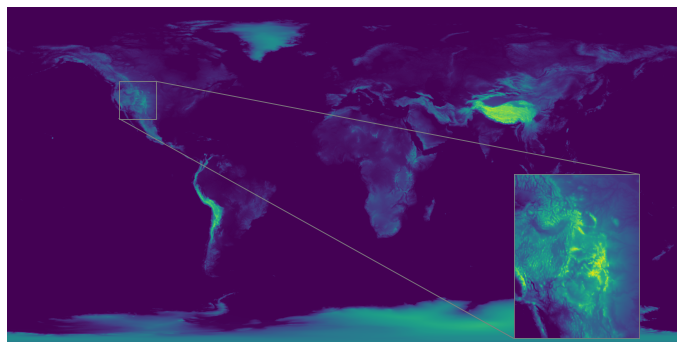

In [17]:
fig = plt.figure(figsize=(12,8))
plt.imshow(z, cmap='viridis')
ax = plt.gca()
ax.axis('off');

z_subset = ((400, 600), (600, 800))
inset_z = z[slice(*z_subset[0]), slice(*z_subset[1])]
axins = ax.inset_axes([0.605, 0.01, 0.49, 0.49])

axins.set_xlim(*z_subset[1])
axins.set_ylim(*z_subset[0])
axins.imshow(inset_z, extent=(*z_subset[1], *z_subset[0]))

for key in axins.spines.keys():
    axins.spines[key].set_color('grey')

axins.set_xticks([])
axins.set_yticks([])
axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins, alpha=0.9);

# plt.savefig('earth_global', bbox_inches='tight', pad_inches=0, dpi=900)

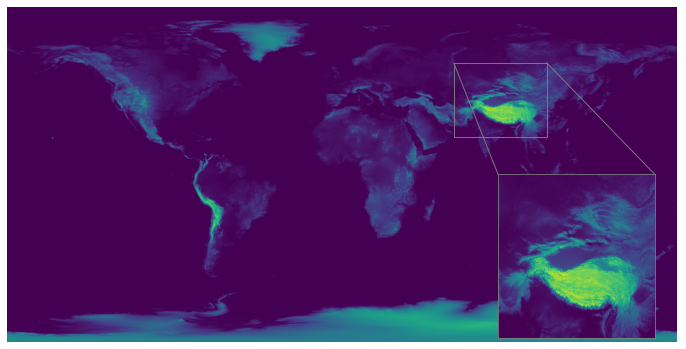

In [38]:
fig = plt.figure(figsize=(12,8))
plt.imshow(z, cmap='viridis')
ax = plt.gca()
ax.axis('off');

z_subset = ((300, 700), (2400, 2900))
inset_z = z[slice(*z_subset[0]), slice(*z_subset[1])]
axins = ax.inset_axes([0.605, 0.01, 0.49, 0.49])

axins.set_xlim(*z_subset[1])
axins.set_ylim(*z_subset[0])
axins.imshow(inset_z, extent=(*z_subset[1], *z_subset[0]))

for key in axins.spines.keys():
    axins.spines[key].set_color('grey')

axins.set_xticks([])
axins.set_yticks([])
axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins, alpha=0.9);

# plt.savefig('earth_global', bbox_inches='tight', pad_inches=0, dpi=900)